In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))


Using TensorFlow backend.


Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 10s 211us/step - loss: 2.1755 - acc: 0.3009 - val_loss: 2.0451 - val_acc: 0.4769
Epoch 2/10
45000/45000 [==============================] - 9s 192us/step - loss: 1.9154 - acc: 0.5859 - val_loss: 1.7918 - val_acc: 0.6463
Epoch 3/10
45000/45000 [==============================] - 9s 191us/step - loss: 1.6614 - acc: 0.6929 - val_loss: 1.5431 - val_acc: 0.7175
Epoch 4/10
45000/45000 [==============================] - 9s 194us/step - loss: 1.4212 - acc: 0.7490 - val_loss: 1.3170 - val_acc: 0.7612
Epoch 5/10
45000/45000 [==============================] - 9s 193us/step - loss: 1.2123 - acc: 0.7863 - val_loss: 1.1283 - val_acc: 0.7918
Epoch 6/10
45000/45000 [==============================] - 9s 190us/step - loss: 1.0437 - acc: 0.8103 - val_loss: 0.9801 - val_acc: 0.8111
Epoch 7/10
45000/45000 [==============================] - 9s 194us/step - loss: 0.9136 - acc: 0.8248 - val_loss: 0.8670 -

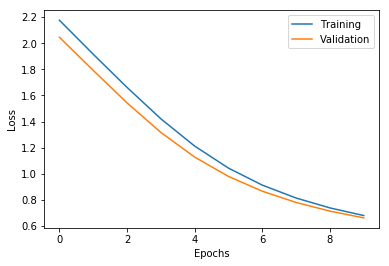

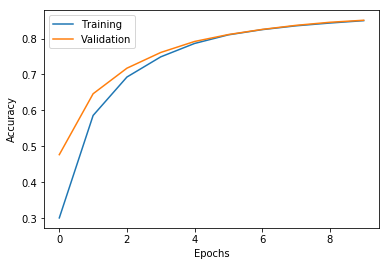

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['Training', 'Validation'])
    plt.show()
    
plot_history(history)